In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [30]:
data_train_path = 'Dataset/train'
data_test_path = 'Dataset/test'
data_val_path = 'Dataset/validation'

In [31]:
img_width = 180
img_height =180 

In [32]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3476 files belonging to 6 classes.


In [33]:
data_cat = data_train.class_names

In [34]:
data_cat

['Acne',
 'Atopic Dermatitis',
 'Eczema',
 'Normal',
 'Seborrheic Keratoses',
 'Tinea Ringworm']

In [35]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 516 files belonging to 6 classes.


In [36]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 3808 files belonging to 6 classes.


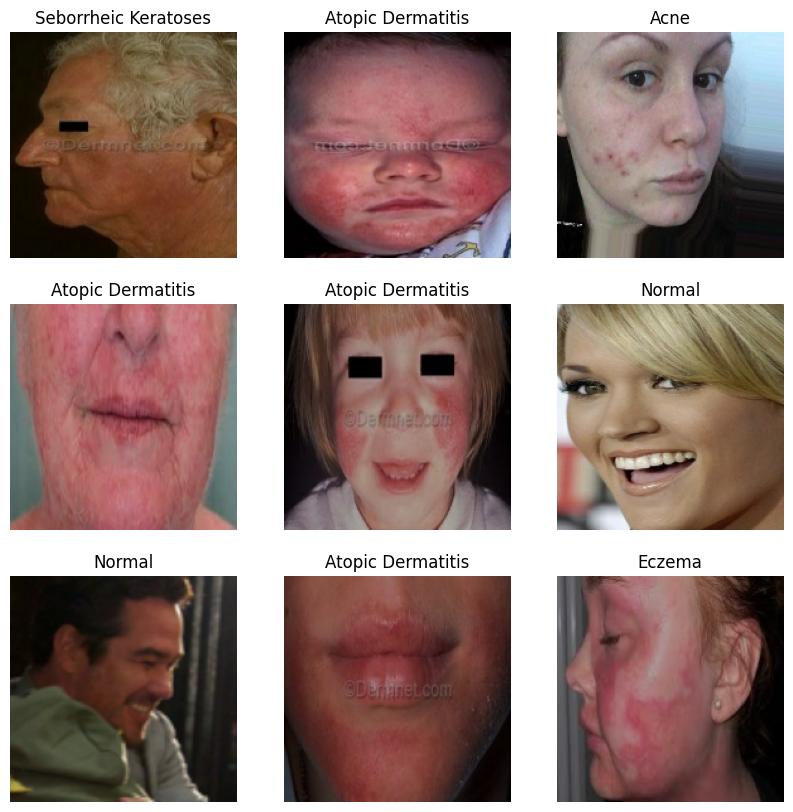

In [37]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [41]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [42]:
epochs_size = 30
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/30
109/109 [==============================] - 46s 414ms/step - loss: 1.3179 - accuracy: 0.5181 - val_loss: 1.0374 - val_accuracy: 0.6027
Epoch 2/30
109/109 [==============================] - 44s 398ms/step - loss: 0.6333 - accuracy: 0.7805 - val_loss: 1.0238 - val_accuracy: 0.6357
Epoch 3/30
109/109 [==============================] - 44s 404ms/step - loss: 0.4012 - accuracy: 0.8674 - val_loss: 1.1377 - val_accuracy: 0.6589
Epoch 4/30
109/109 [==============================] - 43s 392ms/step - loss: 0.2604 - accuracy: 0.9123 - val_loss: 1.2189 - val_accuracy: 0.6880
Epoch 5/30
109/109 [==============================] - 43s 391ms/step - loss: 0.2115 - accuracy: 0.9292 - val_loss: 1.5183 - val_accuracy: 0.6318
Epoch 6/30
109/109 [==============================] - 45s 413ms/step - loss: 0.1586 - accuracy: 0.9459 - val_loss: 1.6537 - val_accuracy: 0.6609
Epoch 7/30
109/109 [==============================] - 44s 404ms/step - loss: 0.1367 - accuracy: 0.9514 - val_loss: 2.0275 - val_ac

Text(0.5, 1.0, 'Loss')

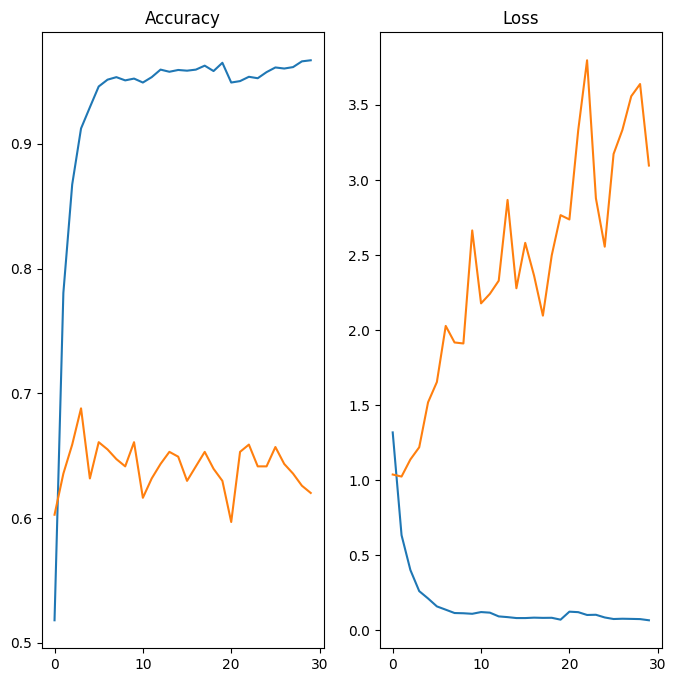

In [43]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [44]:
test_loss, test_accuracy = model.evaluate(data_test)
print(f'Test accuracy: {test_accuracy}')


119/119 [==============================] - 22s 184ms/step - loss: 0.5615 - accuracy: 0.9215
Test accuracy: 0.9214810729026794


119/119 [==============================] - 16s 133ms/step


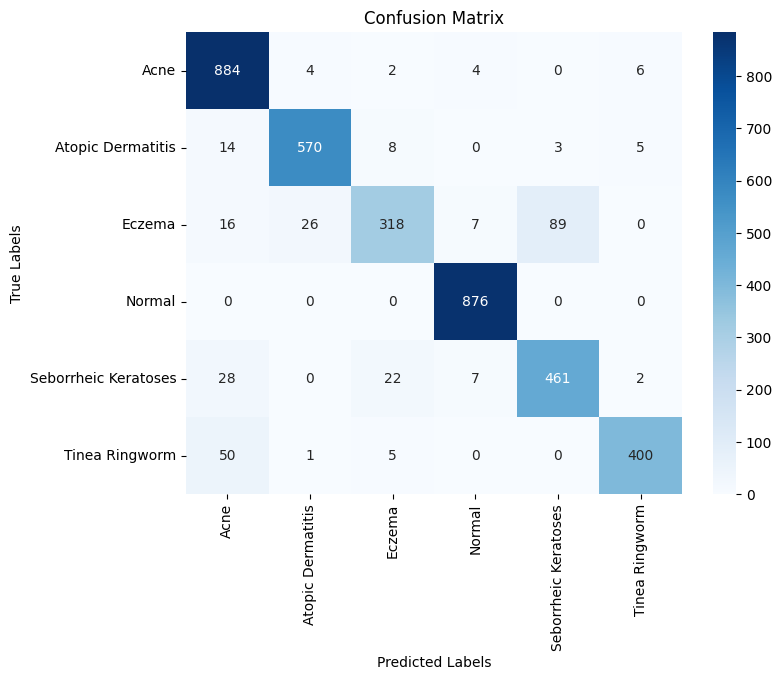

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test data
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = np.concatenate([y for x, y in data_test], axis=0)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [46]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=data_cat)

# Print classification report
print(class_report)


                      precision    recall  f1-score   support

                Acne       0.89      0.98      0.93       900
   Atopic Dermatitis       0.95      0.95      0.95       600
              Eczema       0.90      0.70      0.78       456
              Normal       0.98      1.00      0.99       876
Seborrheic Keratoses       0.83      0.89      0.86       520
      Tinea Ringworm       0.97      0.88      0.92       456

            accuracy                           0.92      3808
           macro avg       0.92      0.90      0.91      3808
        weighted avg       0.92      0.92      0.92      3808



In [47]:
model.save('keras_model.h5')

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
